# Problema 1

Se utiliza el directorio de os para mostrar que se realizó el problema. 
Como nos interesa enumerar los nombres de los archivos, usamos enumerate()

In [26]:
import os

files = os.listdir()
print(files)
dicc = {i:x for i,x in enumerate(files)}
print(dicc)

['.ipynb_checkpoints', 'Untitled.ipynb']
{0: '.ipynb_checkpoints', 1: 'Untitled.ipynb'}


---
# Problema 2

Se utiliza el diccionario en el problema anterior, aprovechando la estructura del diccionario y “list comprehension” para hacerlo en una linea

In [27]:
ccid = {dicc[x] : x for x in dicc}
print(ccid)

{'.ipynb_checkpoints': 0, 'Untitled.ipynb': 1}


Se utiliza el directorio de os para mostrar que se realizó el problema. 
Como nos interesa enumerar los nombres de los archivos, usamos enumerate()

---
# Problema 3

Para la función creamos una string auxiliar que sea la string inicial en minúsculas. Para esto usamos la función lower(). 
Para regresar si la palabra es palindromo, comparó la string auxiliar con la string al reves, la cual obtenemos con una de las formas de definir strings usando [::1].

In [2]:
def palin(s):
    aux = s.lower()
    return aux == aux[::-1]
print(palin("adadadad"))
print(palin("ADADAda"))
print(palin("Mexico"))

False
True
False


---
# Problema 4

Para este problema consideramos que las strings estan en formato DD/MM/AAAA 

Por lo que no consideramos fechas mayores al año 9999. 

Por otro lado, para cosiderar los bisiestos, consideramos que el año no es menor a 1582

Que es cuando se empezó a implementar los años bisiestos.

La función regresa el número de dias entre ambas fechas en valor absoluto o -1 en caso de que alguna de las dos fechas no cumpla con el formato. 

In [3]:
#Función que calcula el numero de días entre 1/1/1582 y d/m/a
def zero1582(d, m, a):
    #Diccionario con la cantidad de dias que tiene cada mes
    mes = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 
           7:31, 8:31, 9:30, 10:31, 11:30, 12:31 }
    
    #Cantidad de años entre a y 1582 por 365
    dia = 365*(a - 1582)
    
    #Agrego el numero de dias entre 12/31/a-1 y d/m/a
    for i in range(1,m):
        dia += mes[i]
    dia += d
    
    #Sumo el numero de años bisietos
    dia += (a - 1580)//4
    
    #Los años multiplos de 100 no son bisietos
    if a > 1699:
        dia -= (a - 1600)//100
    
    #Los años multiplos de 400 si son bisietos
    if a > 1999:
        dia += (a - 1600)//400
    
    #Si a es año bisieto, el codigo suma por default el 29 de febrero
    #Pero si d/m es antes del 29 de febrero y el año es bisieto tengo que restarlo.  
    checa = [a%4 == 0, a%400 == 0 or a%100 != 0, m<=2 and d < 29]
    if all(checa):
        dia -= 1
    return dia

#Funcion que compruebe que cumplen el formato y regresar el resultado
def difdias(fe1, fe2):
    #Paso las strings listas [DD, MM, AAAA]
    fe1 = fe1.split('/')
    fe2 = fe2.split('/')
    
    #Convierto los elementos de strings a int's
    fe1 = [int(x) for x in fe1]
    fe2 = [int(x) for x in fe2]
    
    #Diccionario con la cantidad de dias que tiene cada mes
    mes = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 
           7:31, 8:31, 9:30, 10:31, 11:30, 12:31 }
    
    #Creo una lista de bools para ver que las fechas cumplen el formato pedido
    #Empiezo viendo que el mes y dia sean mayores a 0
    checa = [x > 0 for x in fe1] + [x > 0 for x in fe2] 
    
    #Comprueba que el numero de dias no exceda el maximo numero de dias
    #que puede tener ese mes. (Ex: 43 de Marzo o 30 de febrero.) 
    
    #Bis es el que tiene las condiciones para aceptar el 29 de febrero 
    
    bis = [fe1[2]%4 == 0, fe1[2]%400 == 0 or fe1[2]%100 != 0, fe1[1] == 2 and fe1[0] == 29]
    checa.append(fe1[0] <= mes[fe1[1]] or all(bis))
    
    bis = [fe2[2]%4 == 0, fe2[2]%400 == 0 or fe2[2]%100 != 0, fe2[1] == 2 and fe2[0] == 29]
    checa.append(fe2[0] <= mes[fe2[1]] or all(bis))
    
    #Compruebo que los años no tengan mas de 4 digitos
    checa.append(fe1[2] < 10000)
    checa.append(fe2[2] < 10000)
    
    #Compruebo que los sean al menos 1582 para considerar los bisietos
    checa.append(fe2[2] > 1581)
    checa.append(fe2[2] > 1581)
    
    #Si las fechas cumplen el formato regreso la cantidad de dias entre fechas
    if all(checa):
        dia1 = zero1582(fe1[0], fe1[1], fe1[2])
        dia2 = zero1582(fe2[0], fe2[1], fe2[2])
        return abs(dia1 - dia2)
    
    print("Formato de fecha invalido")
    return -1
        
#Numero de dias que llevo vivo
fe1 = '02/02/2023'
fe2 = '11/03/1999'
print(difdias(fe1, fe2))    

#Numero de dias entre dos años
fe1 = '31/12/2000'
fe2 = '31/12/2001'
print(difdias(fe1, fe2))

#Numero de dias entre dos años cuando el segundo es bisiesto
fe1 = '31/12/1999'
fe2 = '31/12/2000'
print(difdias(fe1, fe2))
    

8729
365
366


---
# Problema 5

Para simplificar el código, usamos 'list comprehension'. 
Como queremos una matriz transpuesta es una lista de lista, nuestra lista debe almacenar listas. 
Estas listas equivalen al elemento en la posición i de cada fila(lista) de la matriz(lista) original. 
Y esto lo hacemos para i igual al número de columnas de la matriz, es decir, el tamaño de una fila. En particular la primera.

In [1]:
def listrans(arr):
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            aux = arr[i][j]
            arr[i][j] = arr[j][i]
            arr[j][i] = aux
    return arr

#Matriz inicial
arr = [[1,2,3],[4,5,6], [7,8,9]]
print(arr, '\n')

#Matriz transpuesta
arr = listrans(arr)
print(arr, '\n')

#La transpuesta de la transpuesta deberia ser igual que la original
arr = listrans(arr)
print(arr, '\n')

#Comprobamos que tambien funcione para strings
matstr = [['a','b', 'c'],['d', 'e', 'f'], ['g', 'h', 'i']] 
print(matstr,'\n')

matstr = listrans(matstr)
print(matstr, '\n')

matstr = listrans(matstr)
print(matstr, '\n')

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] 

[[1, 4, 7], [2, 5, 8], [3, 6, 9]] 

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] 

[['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']] 

[['a', 'd', 'g'], ['b', 'e', 'h'], ['c', 'f', 'i']] 

[['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']] 



---
# Problema 6

Para este problema consideramos una tolerancia de $10^{-8}$ como la condición de paro y un máximo de 200 iteraciones para encontrar la raíz. 
En el notebook se muestran dos ejemplos, el método de Newton-Raphson evaluando la función seno y evaluando la función $x^2 - 4$
Con la función seno, como su derivada es coseno, siempre se mantiene que el valor absoluto de la pendiente no es mayor que 1. 
Por otro lado, derivada de $x^2 - 4$ es $2x$ por lo que la pendiente alrededor de las raíces, $\{-2,2\}$ es mayor que 1. 
Intentamos con un punto inicial cuya derivad no sea mayor que 1 como 0.25 pero tampoco encontró la solución. 


In [26]:
import math

def derix24(x):
    return 2*x

def funcx24(x):
    return x**2 - 4

def newtonrap(func, dif, x):
    tol = 1E-8
    x0 = x
    max_iter = 200 
    i = 0
    x1 = x0
    while abs(func(x1)) > tol and i < max_iter:
        i = i + 1
        x1 = x0 - func(x0)/dif(x1)  # Newton-Raphson equation
        x0 = x1
        if abs(dif(x0)) > 1: 
            i = max_iter
            print("La pendiente en el punto", x0, "es mayor que 1")
    if i < max_iter: 
        print("Se encontro la solucion en", i, "iteraciones")
    else: 
        print("No se encontro solucion")
    return x0

cas1 = newtonrap(math.sin, math.cos, 1)
print(cas1)
print(math.sin(cas1))
cas2 = newtonrap(funcx24,derix24, 4.0)
print(cas2)
print(funcx24(cas2))
cas3 = newtonrap(funcx24,derix24, 0.25)
print(cas3)
print(funcx24(cas3))

Se encontro la solucion en 4 iteraciones
2.923566201412306e-13
2.923566201412306e-13
La pendiente en el punto 2.5 es mayor que 1
No se encontro solucion
2.5
2.25
La pendiente en el punto 8.125 es mayor que 1
No se encontro solucion
8.125
62.015625


---
# Problema 7

Para este problema consideramos que los números llegan en forma de string 

In [19]:
def dectobin(deci):
    #Separo en el numero en parte entera y parte decimal
    num = deci.split('.')
    
    #Creo la string con la transformación a binaria
    #de la parte entera
    aux = int(num[0])
    bin = []
    while aux > 0:
        bin.append(aux%2)
        aux = aux//2
    bin.reverse()
    bin = [str(x) for x in bin]
    pnt = '0'
    
    #Si tiene parte fracionaria, creo la string tras pasarla a binario
    if len(num) > 1:
        pnt = []
        num[1] = '0.' + num[1]
        aux = float(num[1])
        i = 0
        pot = 0.5
        #Como no sabemos si es infinita la parte fracionaria 
        #Pongo un maximo de 10 digitos tras el punto
        while aux > 0 and i < 10:
            if aux >= pot:
                pnt.append('1')
                aux -= pot
            else:
                pnt.append('0')
            pot = pot/2.0
            i +=1
        pnt = ''.join(pnt)

    return ''.join(bin) + '.' + pnt

def bintodec(bini):
    num = bini.split('.')
    
    #Calculo la parte entera
    pot = 1
    ent = 0
    num[0] = num[0][::-1]
    for x in num[0]:
        if x == '1':
            ent += pot
        pot *= 2
    
    #Calculo la parte fraccionaria
    frac = '0'
    if len(num) > 1:
        frac = 0
        pot = 0.5
        for x in num[1]:
            if x == '1':
                frac += pot
            pot *= 0.5
        frac = str(frac).split('.')[1]
        
    return str(ent) + '.' + frac

prueba = '21.625'
print(dectobin(prueba))
    
bini = '10101.101'
print(bintodec(bini))

10101.101
21.625


---
# Problema 8

In [7]:
import yaml

def sinaceto(s):
    reemplazo = (
        ('Ã¡', 'a'),
        ('Ã©', 'e'),
        ('Ã', 'i'),
        ('i³', 'o'),
        ('iº', 'u'),
        ('\xAD','')
    )
    for a, b in reemplazo:
        s = s.replace(a, b)
    return s

def agrega(a, dic):
    if a.isalpha():
        a = a.lower()
    if a in dic:
        dic[a] = dic[a] + 1
    else:
        dic[a] = 1
        
def divide(word):
    lista = [word]
    aux = True
    while aux:
        aux2 = False
        quita = ''
        dato = ''
        for word in lista:
            if not word.isalpha() and len(word) > 1: 
                aux2 = True
                quita = word
                for x in word:
                    if not x.isalpha():
                        dato = x
                        break
                break
        if aux2:
            lista.remove(quita)
            for x in quita:
                if x == dato:
                    lista.append(dato)
            lista += quita.split(dato)
        aux = aux2
    while '' in lista:
        lista.remove('')
    return lista

def cuenta(doc):
    datos = []
    with open(doc) as f:
        contents = f.read()
        contents = sinaceto(contents)
        datos = contents.split()
    dic = {}
    for word in datos:
        if word.isalpha():
            agrega(word, dic)
        else: 
            lista = divide(word)
            for x in lista:
                agrega(x, dic)
    dic = sorted(dic.items(), key=lambda x:x[1], reverse = True)
    dic = dict(dic)
    return dic


doc = 'prueba.txt'
dic = cuenta(doc)
print(dic)
with open(r'respuesta.yaml', 'w') as file:
    documents = yaml.dump(dic, file, sort_keys=False)

{'es': 2, 'este': 1, 'un': 1, 'documento': 1, 'que': 1, 'la': 1, 'prueba': 1, 'numero': 1, '1': 1, '.': 1}


---
# Problema 9

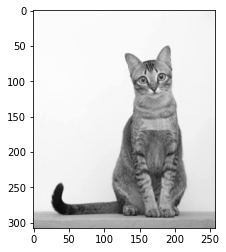

True


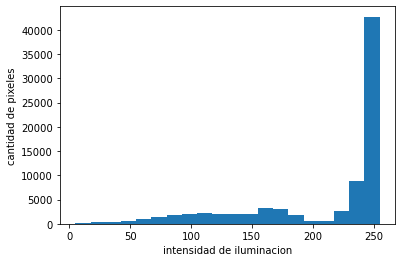

In [33]:
from PIL import Image
import urllib
import numpy as np
import matplotlib.pyplot as plt

def hacehist(url, n):
    req = urllib.request.urlopen(url)

    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    
    img = Image.open("img.png")
    plt.imshow(img)
    plt.show()
    img = img.convert('L')
    
    counts, bins = np.histogram(np.array(img), bins = n)
    plt.hist(bins[:-1], bins, weights=counts)
    
    plt.xlabel('intensidad de iluminacion')
    plt.ylabel('cantidad de pixeles')
    plt.show()

    
url = 'https://developer.ibm.com/developer/default/articles/learn-the-basics-of-computer-vision-and-object-detection/images/greyscaleimage.png'
hacehist(url, 20)

In [ ]:
#img = Image.open("img.png")
#img = img.convert('L')

#counts, bins = np.histogram(np.array(img), bins = n)
#plt.hist(bins[:-1], bins, weights=counts)